In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
from pydub.utils import mediainfo
import eyed3
import plotly.express as px
from tqdm import tqdm
import json
import sys
sys.path.append("../")


In [2]:
from bengali_asr.models import Whisper
from configs.whisper_characterwise import Configs
CFG = Configs([])

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


inference mode is on


In [3]:
from IPython.display import Audio, display

In [4]:
mdata = pd.read_csv("/app/dataset/metadata/train_metadata.csv")

In [5]:
audio = np.load("../../dataset/train_numpy_16k/f031736279b7.npy")
spectrogram = CFG.mel_transorm_valid(audio)

In [68]:
from audiomentations import AddGaussianNoise, TimeStretch, PitchShift, Shift

In [7]:
print("original audio")
display(Audio(audio, rate=16000))

original audio


In [8]:
ts = TimeStretch((0.95,0.5),prob=1)
print("Time stretch")
display(Audio(ts(audio), rate=16000))

TypeError: __init__() got an unexpected keyword argument 'prob'

In [ ]:
ts = PitchShift()
print("Time stretch")
display(Audio(ts(audio), rate=16000))

Time stretch


/app/bengali-speech-recognition/notebooks/../bengali_asr/dataset/waveform_augments.py:23: FutureWarning: Pass sr=16000, n_steps=1 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, self.sr, self.n_steps)


original:


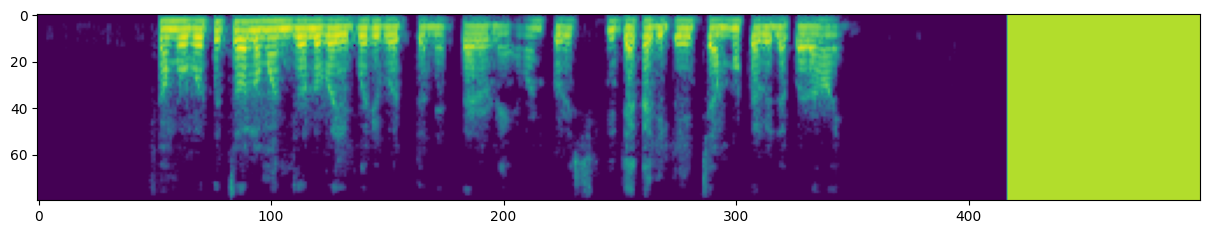

In [10]:
print("original:")
plt.figure(figsize=(15,15))
plt.imshow(spectrogram[:,:500])

In [8]:
from bengali_asr.dataset.mel_augments import FrequencyMasking,TimeMasking

In [61]:
fm = FrequencyMasking(F=2,prob=1)
tm = TimeMasking(prob=1)

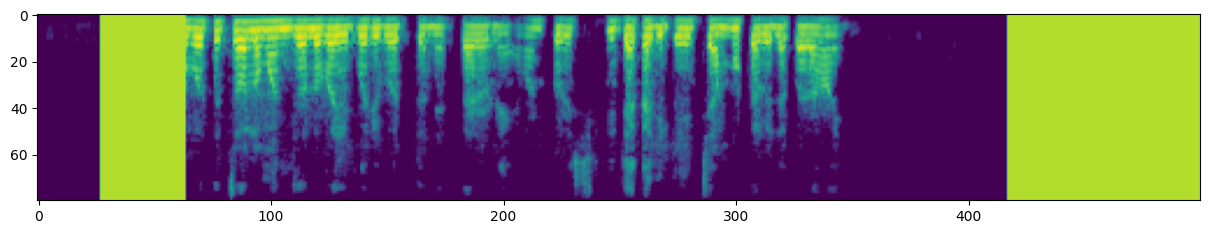

In [67]:
plt.figure(figsize=(15,15))
spectrogram = CFG.mel_transorm_valid(audio)
plt.imshow(tm(spectrogram[:,:500]))